In [1]:
from qiskit import *
from math import *
import qiskit.ignis.verification.tomography as tomo

#----------Pour simulation noiseless---------------
%matplotlib inline
from qiskit.tools.visualization import plot_histogram
QASM_simulator = Aer.get_backend('qasm_simulator')

#----------POUR CALCULS ON QC---------------------
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_essex')
from qiskit.tools.monitor import job_monitor

#----------Pour simuler with noise le QC chargé au dessus: ----------
from qiskit.providers.aer import noise
properties = qcomp.properties()
coupling_map = qcomp.configuration().coupling_map
# (Generate an Aer noise model for qcomp)
noise_model = noise.device.basic_device_noise_model(properties)
basis_gates = noise_model.basis_gates

In [5]:
TypeOfRun = 1
#1 == simulator w/o noise
#2 == simulator w noise
#3 == QC


alpha = []
dalpha = 0.1
Exp_Val = []

dN = 2500
N = 0

k = 1 #To count how many times we want to do the same experience

#loop for the number of times the experiment is done
while True: 
    i = 0
    N = N + dN
    #k = k+1
    
    
    if TypeOfRun == 1 :
        filestream=open('QVE_p_sim_N='+str(N)+'_'+str(k)+'.txt','w+')
    elif TypeOfRun == 2 :
        filestream=open('QVE_w_noise_N='+str(N)+'_'+str(k)+'.txt','w+')
    elif TypeOfRun == 3 :
        filestream=open('QVE_qc_N='+str(N)+'.txt','w+')

    alpha.clear()
    Exp_Val.clear()
    alpha.append(3)
    
    #main loop, stops when smaller than epsilon 
    while True:

        normalisation = sqrt(2*(1+(1-alpha[i])**2))

        #starting_vector = [
           #(1-alpha[i])/normalisation,
            #1/normalisation,
            #1/normalisation,
           #(1-alpha[i])/normalisation]

        n = 2 #number of qubit


        circuit = QuantumCircuit(n, n, name="initializer_circ")
        #circuit.initialize(starting_vector, [0, 1])
        circuit.ry(pi/2, [0])
        circuit.ry(2*acos(((1-alpha[i])/normalisation)*sqrt(2)), [1])
        circuit.cx([0],[1])

        circuit.h(0)

        circuit.measure(range(n), range(n))
        if TypeOfRun == 1:
            result = execute(circuit, backend=QASM_simulator, shots=N).result()
        elif TypeOfRun == 2:
            result = execute(circuit, backend = QASM_simulator,
                      coupling_map=coupling_map,
                      noise_model=noise_model,
                      basis_gates=basis_gates,
                      shots=N).result()
        elif TypeOfRun == 3:
            job = execute(circuit, backend=qcomp, shots = N)
            job_monitor(job)
            result = job.result()

        counts = result.get_counts(circuit)

        A = 0
        if counts.get('00'):
            A = A + counts.get('00')
        if counts.get('01'):
            A = A - counts.get('01')
        if counts.get('10'):
            A = A + counts.get('10')
        if counts.get('11'):
            A = A - counts.get('11')
        A = A / N

        circuit = QuantumCircuit(n, n, name="initializer_circ")
        #circuit.initialize(starting_vector, [0, 1])
        circuit.ry(pi/2, [0])
        circuit.ry(2*acos(((1-alpha[i])/normalisation)*sqrt(2)), [1])
        circuit.cx([0],[1])

        circuit.h(1)

        circuit.measure(range(n), range(n))
        if TypeOfRun == 1:
            result = execute(circuit, backend=QASM_simulator, shots=N ).result()
        elif TypeOfRun == 2:
            result = execute(circuit, backend = QASM_simulator,
                      coupling_map=coupling_map,
                      noise_model=noise_model,
                      basis_gates=basis_gates,
                      shots=N).result()
        elif TypeOfRun == 3:
            job = execute(circuit, backend=qcomp, shots = N)
            job_monitor(job)
            result = job.result()

        counts = result.get_counts(circuit)

        B = 0
        if counts.get('00'):
            B = B + counts.get('00')
        if counts.get('01'):
            B = B + counts.get('01')
        if counts.get('10'):
            B = B - counts.get('10')
        if counts.get('11'):
            B = B - counts.get('11')
        B = B / N


        circuit = QuantumCircuit(n, n, name="initializer_circ")
        #circuit.initialize(starting_vector, [0, 1])
        circuit.ry(pi/2, [0])
        circuit.ry(2*acos(((1-alpha[i])/normalisation)*sqrt(2)), [1])
        circuit.cx([0],[1])


        circuit.measure(range(n), range(n))
        if TypeOfRun == 1:
            result = execute(circuit, backend=QASM_simulator, shots =N).result()
        elif TypeOfRun == 2:
            result = execute(circuit, backend = QASM_simulator,
                      coupling_map=coupling_map,
                      noise_model=noise_model,
                      basis_gates=basis_gates,
                      shots=N).result()
        elif TypeOfRun == 3:
            job = execute(circuit, backend=qcomp, shots = N)
            job_monitor(job)
            result = job.result()

        counts = result.get_counts(circuit)

        C = 0
        if counts.get('00'):
            C = C + counts.get('00')
        if counts.get('01'):
            C = C - counts.get('01')
        if counts.get('10'):
            C = C - counts.get('10')
        if counts.get('11'):
            C = C + counts.get('11')
        C = C / N

        Exp_Val.append(0.5*(A+B)+C)

        filestream.write(str(alpha[i])+ ' '+ str(Exp_Val[i])+'\n')

        alpha.append(alpha[i]-dalpha*((2*alpha[i]**2-4)/((alpha[i]**2-2*alpha[i]+2)**2)))
        i = i+1
        if(abs(alpha[i]-alpha[i-1])<0.0001):
            break
    filestream.close()
    print(str(N))
    if(N >= 10000):
    #print(str(k))
    #if(k >= 100):
        break

2500
5000
7500
10000


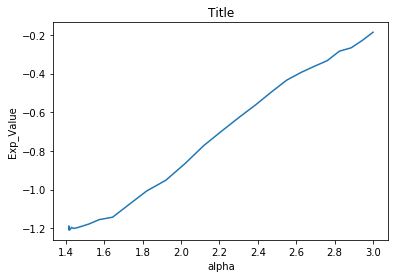

In [6]:
import matplotlib.pyplot as plt 

# plotting the points  
plt.plot(alpha[0:len(alpha)-1], Exp_Val) 
  
# naming the x axis 
plt.xlabel('alpha') 
# naming the y axis 
plt.ylabel('Exp_Value') 
  
# giving a title to my graph 
plt.title('Title') 
  
# function to show the plot 
plt.show() 

i = 0
alpha = []
dalpha = 0.1
Exp_Val = []

#alpha de départ
alpha.append(3)


print(2*alpha[i]**2-4)
print((alpha[i]**2-2*alpha[i]+2))
print(alpha[i]-dalpha*((2*alpha[i]**2-4)/((alpha[i]**2-2*alpha[i]+2)**2)))


In [7]:
circuit.draw()